<a href="https://colab.research.google.com/github/gguillaux/ml_python/blob/master/fiap_modelos_de_ia_e_ml_exercicio_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercício #2.2

Utilizando dataset do arquivo circulos.csv faça a clusterização utilizando
k-means e DBSCAN.
Faça a plotagem da clusterização gerada (com cores diferentes para
cada cluster).
1. Qual é a melhor quantidade de Clusters?
2. Qual é a melhor técnica (k-means ou DBSCAN) a ser utilizada nessa
clusterização?

In [0]:
import numpy as np
import pandas as pd
from google.colab import drive
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, DBSCAN

In [34]:
drive.mount('./drive', force_remount=True)

Mounted at ./drive


In [0]:
plt.style.use('dark_background')

In [0]:
circles = pd.read_csv('./drive/My Drive/fiap/datasets/Circulos.csv',
            sep=',',
            index_col=0)

In [0]:
def plot_circle(df, c=None):
    fig, ax = plt.subplots()
    fig.set_size_inches(5, 5)
    ax.scatter(df.X, df.Y, c=c)
    plt.show()


def plot_elbow_analysis(df, r):
    inertias = []
    clusters = [i + 1 for i in range(r)]
    for x in clusters:
        kmeans = KMeans(n_clusters=x)
        kmeans.fit(df)
        inertias.append(kmeans.inertia_)
    plt.figure(figsize=(12,7))
    plt.plot(clusters, inertias)
    plt.xlabel('Clusters')
    plt.ylabel('Inertias')
    plt.title('Elbow Analysis')
    plt.show()

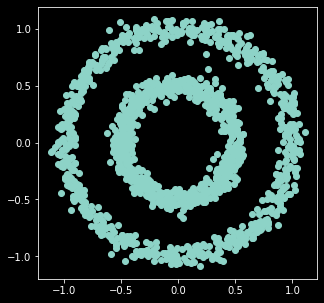

In [38]:
plot_circle(circles)

## Analise do cotovelo para encontrar numero ideal de clusters

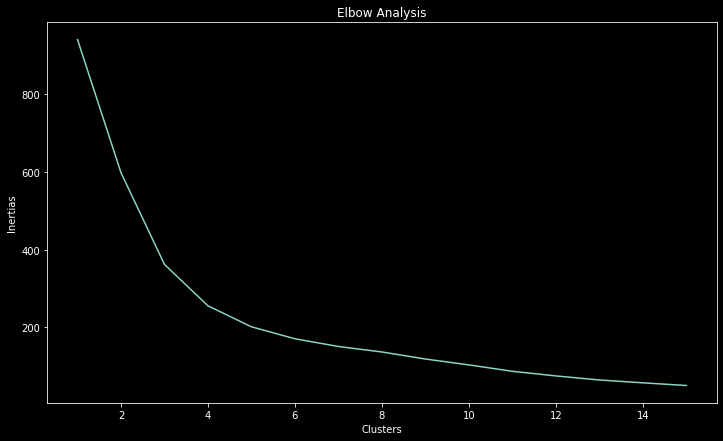

In [39]:
plot_elbow_analysis(circles, 15)

In [0]:
def plot_kmeans(df, clusters):
    kmeans = KMeans(n_clusters=clusters)
    kmeans.fit(df)
    plot_circle(df, kmeans.labels_)

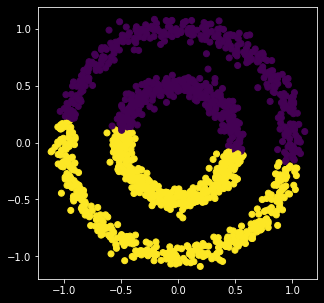

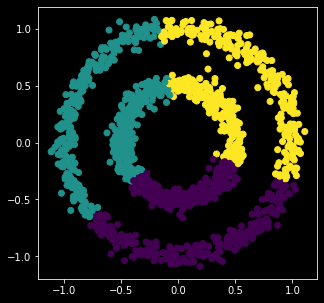

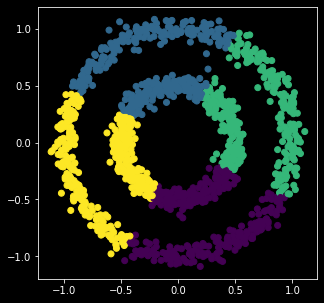

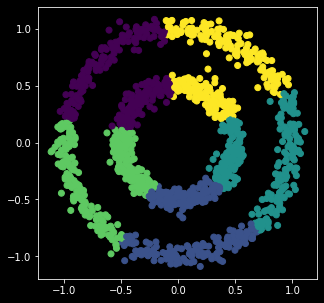

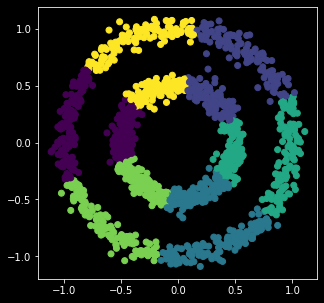

In [41]:
# com o limite em 6 clusters, plotar os resultados encontrados
for x in range(2,7):
    plot_kmeans(circles, x)

### Conclusao - KMeans
Para este problema o Kmeans mostra que so consegue desenhar solucoes linearmente separaveis. O visivel cluster do circulo interior nao e encontrado.

In [0]:
def plot_dbscan(df, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(df)
    plot_circle(df,
                dbscan.labels_)
    return dbscan

EPS = 0.1
SAMPLES = 1


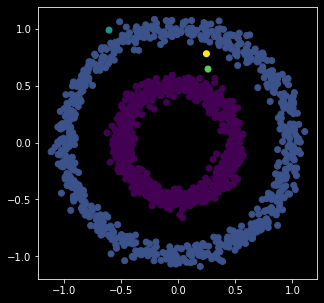

EPS = 0.1
SAMPLES = 2


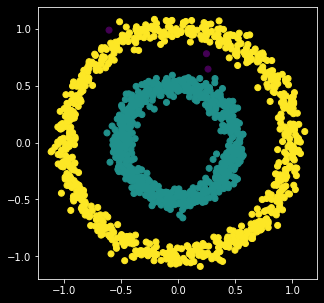

EPS = 0.12666666666666668
SAMPLES = 1


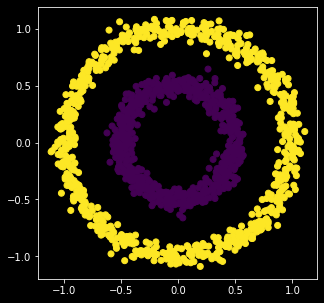

EPS = 0.12666666666666668
SAMPLES = 2


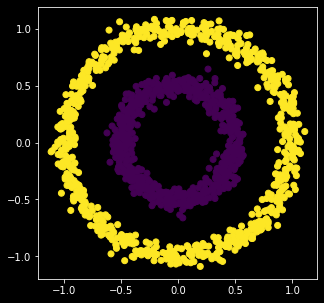

EPS = 0.15333333333333332
SAMPLES = 1


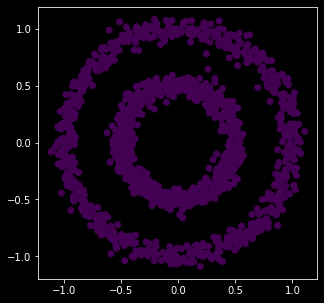

EPS = 0.15333333333333332
SAMPLES = 2


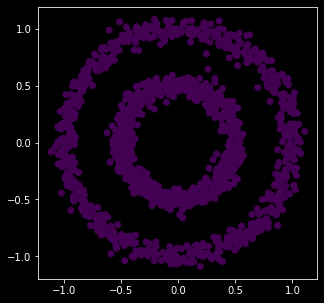

EPS = 0.18
SAMPLES = 1


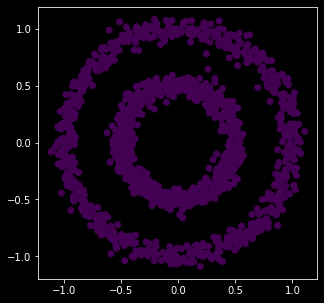

EPS = 0.18
SAMPLES = 2


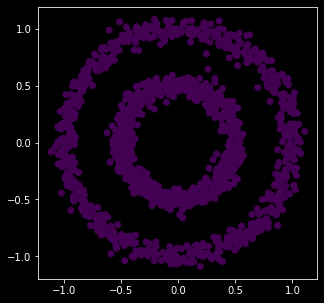

In [58]:
for i in np.linspace(0.1, 0.18, 4):
    for j in range(1, 3):
        print('EPS = {}\nSAMPLES = {}'.format(i,j))
        plot_dbscan(circles, i, j)

## Conclusao
Para este problema a solucao ideal se mostrou usar o DBSCAN com eps = 0.125 e 1 sample. Estas foram as paremetrizacoes mais simples que conseguiram distinguir melhor o problema e separar o circulo interior do circulo exterior.